,anno,detenuti_uk,capienza_uk,sovraffollamento_uk,suicidi_uk,detenuti_ita,capienza_ita,sovraffollamento_ita,suicidi_ita
0,2011,85535,87692,98,41,NaN,NaN,NaN,54
1,2012,85868,89364,96,52,NaN,NaN,NaN,65
2,2013,83567,86833,96,57,NaN,NaN,NaN,42
3,2014,84475,85826,98,65,50282.0,54745.0,108.0,42
4,2015,84475,85826,98,69,50239.0,53410.0,106.0,31
5,2016,84640,86355,98,87,50806.0,55978.0,110.0,36
6,2017,84925,86098,99,56,51078.0,59038.0,115.0,47
7,2018,83083,85705,97,67,51141.0,61131.0,119.0,82
8,2019,82733,84623,98,46,51252.0,62232.0,121.0,51
9,2020,80382,82429,98,67,51126.0,54605.0,106.0,45


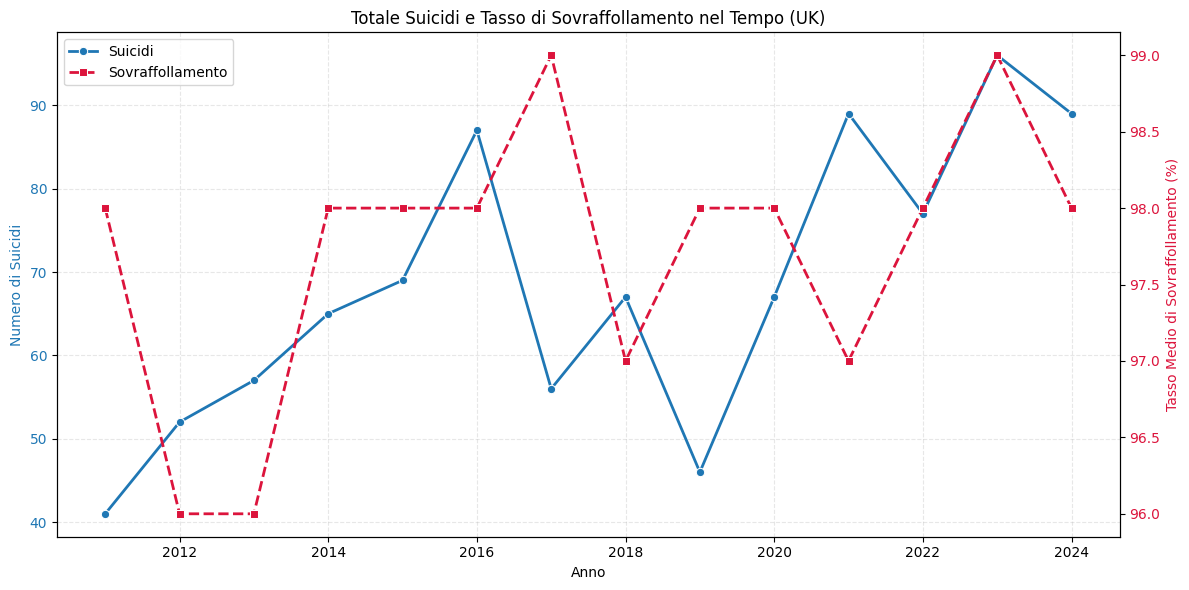

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# 1. Carica il file e togli l'ultima riga
df = pd.read_excel('../Data/Dataset_processed/dati_uk.xlsx')
df = df.iloc[:-1].reset_index(drop=True)

display(df)

# 2. Prepara trend rinominando le colonne
trend = df.rename(columns={
    'anno': 'Anno',
    'sovraffollamento_uk': 'Tasso_sovraffollamento',
    'suicidi_uk': 'Suicidi'
})

# 3. Plotting con doppio asse
fig, ax1 = plt.subplots(figsize=(12, 6))

# Suicidi (asse sinistro)
h_suicidi = sns.lineplot(
    data=trend, x='Anno', y='Suicidi',
    marker='o', ax=ax1, lw=2, label='Suicidi'
).lines[0]
ax1.set_xlabel('Anno')
ax1.set_ylabel('Numero di Suicidi', color=h_suicidi.get_color())
ax1.tick_params(axis='y', labelcolor=h_suicidi.get_color())
ax1.grid(True, linestyle='--', alpha=0.3)

# Sovraffollamento (asse destro)
ax2 = ax1.twinx()
h_sovraff = sns.lineplot(
    data=trend, x='Anno', y='Tasso_sovraffollamento',
    marker='s', ax=ax2, lw=2, linestyle='--', color='crimson',
    legend=False
).lines[0]
ax2.set_ylabel('Tasso Medio di Sovraffollamento (%)', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Legenda custom
ax1.legend(
    [h_suicidi, h_sovraff],
    ['Suicidi', 'Sovraffollamento'],
    loc='upper left'
)

plt.title('Totale Suicidi e Tasso di Sovraffollamento nel Tempo (UK)')
plt.tight_layout()
plt.show()
